<a href="https://colab.research.google.com/github/sayed6201/nlp_20newsgroups_exercise/blob/main/exercise_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports**

In [64]:
import sklearn as sklearn
from sklearn.datasets import fetch_20newsgroups
from pprint import pprint

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# **Data Importing**

In [3]:
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

In [4]:
pprint(list(newsgroups_train.target_names))
pprint(dir(newsgroups_train))
pprint(newsgroups_train.target)

pprint(len(newsgroups_train.data))
pprint(len(newsgroups_test.data))

x_train, y_train = newsgroups_train.data, newsgroups_train.target
x_test, y_test = newsgroups_test.data, newsgroups_test.target

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
['DESCR', 'data', 'filenames', 'target', 'target_names']
array([7, 4, 4, ..., 3, 1, 8])
11314
7532


# **Testing Some Classifier**

                          precision    recall  f1-score   support

             alt.atheism       0.80      0.52      0.63       319
           comp.graphics       0.81      0.65      0.72       389
 comp.os.ms-windows.misc       0.82      0.65      0.73       394
comp.sys.ibm.pc.hardware       0.67      0.78      0.72       392
   comp.sys.mac.hardware       0.86      0.77      0.81       385
          comp.windows.x       0.89      0.75      0.82       395
            misc.forsale       0.93      0.69      0.80       390
               rec.autos       0.85      0.92      0.88       396
         rec.motorcycles       0.94      0.93      0.93       398
      rec.sport.baseball       0.92      0.90      0.91       397
        rec.sport.hockey       0.89      0.97      0.93       399
               sci.crypt       0.59      0.97      0.74       396
         sci.electronics       0.84      0.60      0.70       393
                 sci.med       0.92      0.74      0.82       396
         

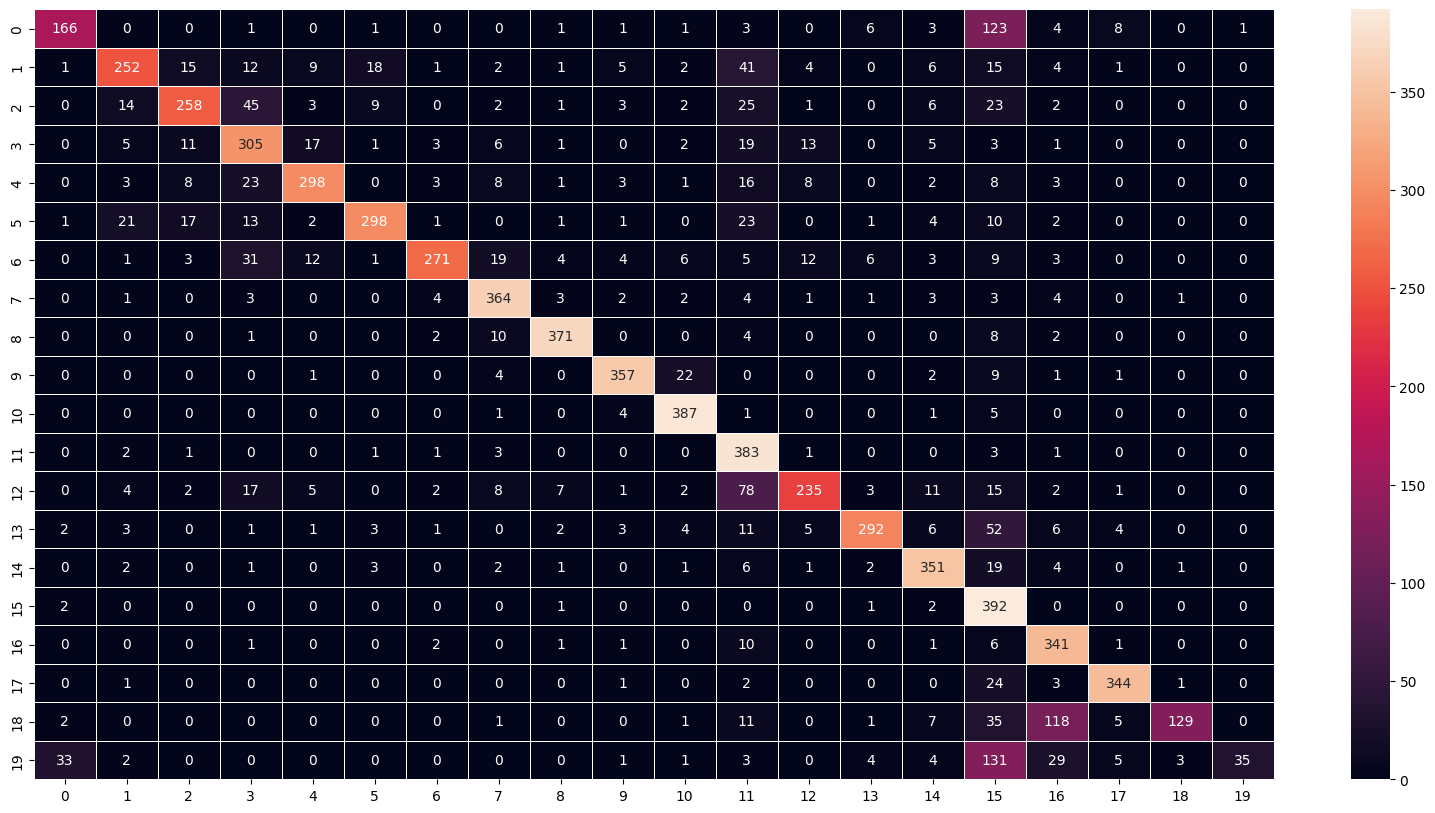

In [72]:

from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
import json

ml_pipeline =  Pipeline([
    ("vect", TfidfVectorizer()),
    ("tfidf", TfidfTransformer()),
    ("clf", MultinomialNB())
])
ml_pipeline.fit(x_train, y_train)


plt.figure(figsize=(20, 10))
sns.heatmap(confusion_matrix(y_test, predicted_y), annot=True, fmt="d",  linewidths=0.6)

print(classification_report(y_test,predicted_y, target_names=newsgroups_train.target_names))



In [17]:
predicted_y = ml_pipeline.predict(x_test)

                          precision    recall  f1-score   support

             alt.atheism       0.86      0.74      0.80       319
           comp.graphics       0.71      0.83      0.76       389
 comp.os.ms-windows.misc       0.76      0.78      0.77       394
comp.sys.ibm.pc.hardware       0.72      0.77      0.74       392
   comp.sys.mac.hardware       0.83      0.84      0.84       385
          comp.windows.x       0.84      0.78      0.81       395
            misc.forsale       0.76      0.88      0.82       390
               rec.autos       0.90      0.90      0.90       396
         rec.motorcycles       0.96      0.95      0.96       398
      rec.sport.baseball       0.93      0.95      0.94       397
        rec.sport.hockey       0.97      0.97      0.97       399
               sci.crypt       0.96      0.91      0.93       396
         sci.electronics       0.79      0.80      0.80       393
                 sci.med       0.90      0.85      0.87       396
         

<Axes: >

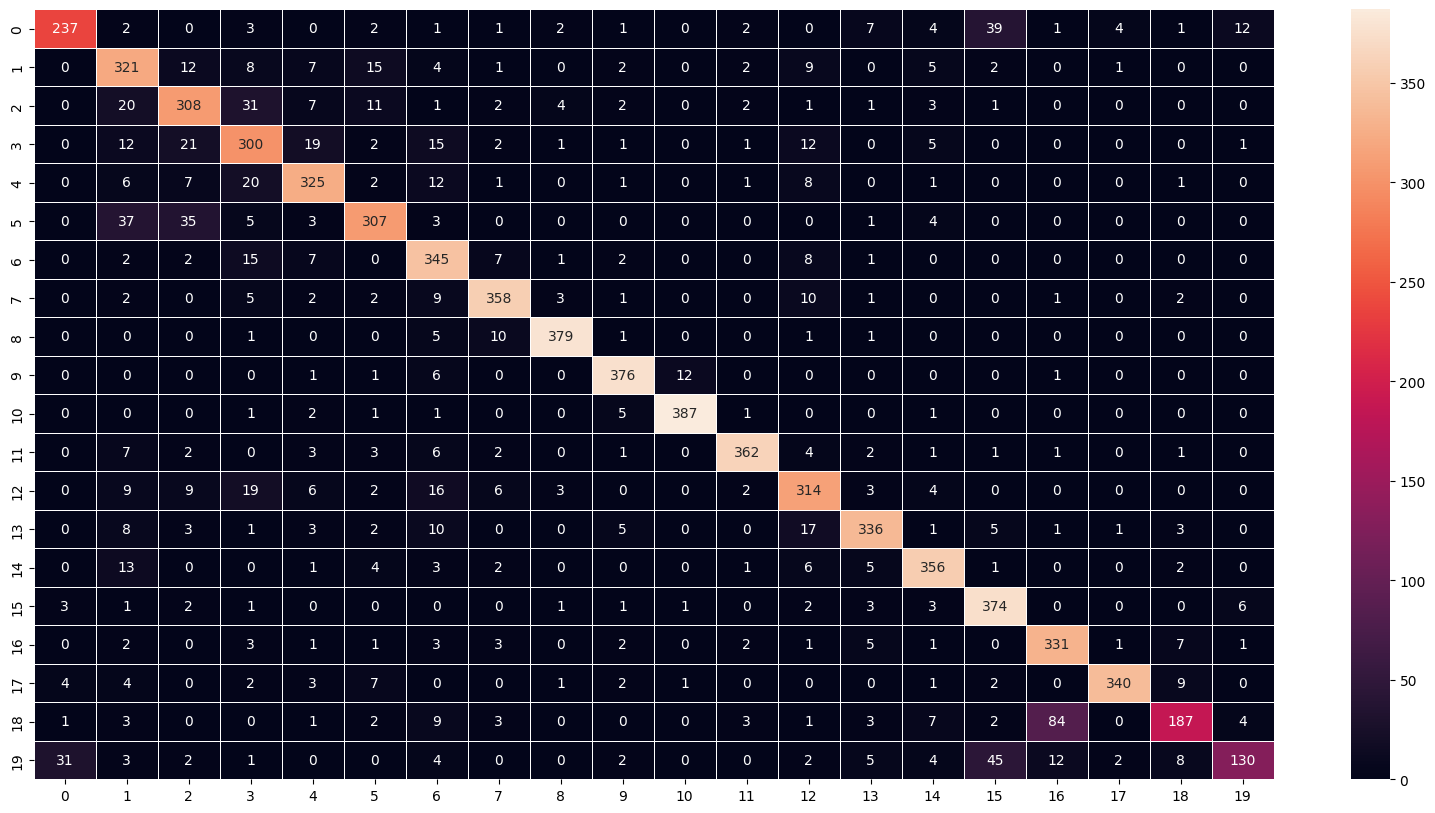

In [69]:
from sklearn.linear_model import LogisticRegression

ml_pipeline_lr =  Pipeline(
  [   ("vect", TfidfVectorizer()),
      ("tfidf", TfidfTransformer()),
      ("clf", LogisticRegression()),
  ]
)
ml_pipeline_lr.fit(x_train, y_train)
predicted_y_lr = ml_pipeline_lr.predict(x_test)
print(classification_report(y_test,predicted_y_lr, target_names=newsgroups_train.target_names))

plt.figure(figsize=(20, 10))
sns.heatmap(confusion_matrix(y_test, predicted_y_lr), annot=True, fmt="d", linewidths=0.6)
